Analysing Predictive 

Analysis of Code Feature Impact
=========

---

This file contains code to plot and analyse predictive impact of features most correlated with pass rates in statement edits. 

This file is used to generate the data used to produce **Table V** of the paper: *Analysing Program Transformation Spaces for Genetic Improvement using Gin*

In preliminary analysis we found that though code features weren't strongly correllated with pass rates for single edit patches across projects the strongest correlations were:


| Feature       | Correlation           | Edit Type  |
| ------------- |-------------| ------|
| Average Norm. Def-Use Dist      | 0.204 | (statement edits)  |
| Median Norm. Def-Use Dist      | 0.190 | (statement edits) |
| Cyclomatic Complexity      | -0.164 | (line edits)  |


None of the correlations are significant so we explore what might be preventing them working as a predictive model of GI-ability. We do this by using them and doing a qualitative study of the code where a predictive model built using these features works and (perhaps most importantly) where they **don't** work. 

The predictive model we choose here is:


```python
if norm_median_def_use_distance(m) >= 0.5 
    and cyclomatic_complexity(m) <= 0.3:
    # predict m is APM-able
elif orm_median_def_use_distance(m) <= 0.2 
    and cyclomatic_complexity(m) >= 0.5:
    # predict m is non APM-able
else:
    # make no prediction either way
```

The thresholds are chosen so as to leave a gap between the categories -- this avoids the accuracy of our preditions being affected by fuzzy boundaries. They are also chosen so that we have a managable number of methods to look at in each category.  We compare this prediction to actual pass rates. We consider an actual pass rate for a method to to be good if the average number of random statement edits on that methods that *still* pass all the tests is greater than or equal to 50%.  Conversely, we consider the pass rate for the method to be poor if the number of tests passed on random edits is less than or equal to 20%. 

Now we have a prediction of GI-ability (in our model above) and the actual GI-ability (measured in terms of pass rates). So now we can come up with a simple confusion matrix:

|        | Predicted APM-able          | Predicted non-GI able   |
| ------------- |-------------| ------|
| **Actual GI-Able**      | Predictably good methods | Surprisingly good methods |
| **Actual non-GI-Able**     | Suprisingly bad methods  | Predictably bad methods |

By inspecting the methods identified in each cell we can see which features might be contributing to its unpredictability or otherwise. The most interesting category is the suprisingly bad methods - this (well-populated) category has some interesting features - outlined in the text later in this file - that defeat our simple model. This might inform future work in predicting GI-ability of methods. 

One last caveat is that our predictive model is ad-hoc based on the correlations and features we have seen in the code. Minor adjustments to the model might give slightly better results (try this in the code below!). The current model is primarily designed as a starting point for identifying method features that might stymie simple predictive models of GI-ability. 

In [1]:
# read file
import pandas
import csv
import re
import os
'''
from google.colab import files
uploaded = files.upload()
for k in uploaded:
  name=k
  # the file to read is selected here.
  # for this repository you can select the file:
  # ./merged_stats_features.csv
'''
k='merged_stats_features.csv'
df = pandas.read_csv(k) # merged_stats_feartures.csv
print(df)

     CompositeKey    Project  MethodIndex  \
0       junit4331     junit4          331   
1           gson7       gson            7   
2          spark9      spark            9   
3       opennlp57    opennlp           57   
4           gson2       gson            2   
..            ...        ...          ...   
462      druid752      druid          752   
463     junit4570     junit4          570   
464  mybatis-3193  mybatis-3          193   
465     junit4302     junit4          302   
466       arthas2     arthas            2   

                                            MethodName  MethodLength  \
0       junit.runner.BaseTestRunner.filterLine(String)            12   
1    com.google.gson.Gson.atomicLongArrayAdapter(Ty...            24   
2    spark.staticfiles.StaticFilesConfiguration.con...            11   
3        opennlp.tools.util.AbstractEventStream.read()            40   
4                 com.google.gson.GsonBuilder.create()            11   
..                         

In [2]:
# select the columns
# select the x values
normAveUDDist=df['AveUseDefDist/MethodLength'].to_list() # Average use def distance
normMedUDDist=df['MedUseDefDist/MethodLength'].to_list() # Median use def distance
normCyc=df['cyc/length'].to_list() 
normNCSS=df['ncss/length'].to_list()
normNPath=df['npath/length'].to_list()
# y value
propStatementPassed=df['PropStatPassed'].to_list() # proportion of statement edits passed


Do some plots - visually inspect the correlations!

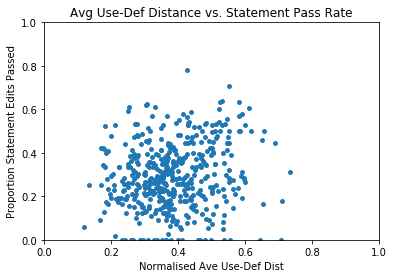

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

# plot 1 - norm average use def distance vs proportion of statement passed
# now plot the lines
plt.scatter(normAveUDDist,propStatementPassed,s=15)
ax=plt.gca()
ax.set_xlim(0,1)
ax.set_ylim(0,1)
plt.xlabel("Normalised Ave Use-Def Dist");
plt.ylabel("Proportion Statement Edits Passed");
plt.title("Avg Use-Def Distance vs. Statement Pass Rate");
  #cbar=plt.colorbar()
  #cbar.set_label('proportion passed')
  #plt.savefig('imfilesNew/'+hist_dir+'/'+p+'mean_scatter.png')
plt.show() # won't work without tkl
plt.close()

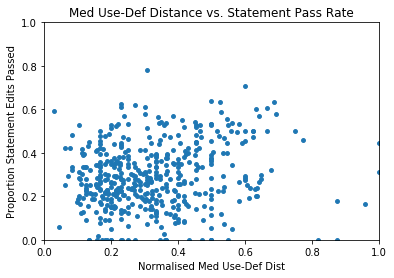

In [4]:
# plot 2 - norm median use def distance vs proportion of statement passed
# now plot the lines
plt.scatter(normMedUDDist,propStatementPassed,s=15)
ax=plt.gca()
ax.set_xlim(0,1)
ax.set_ylim(0,1)
plt.xlabel("Normalised Med Use-Def Dist");
plt.ylabel("Proportion Statement Edits Passed");
plt.title("Med Use-Def Distance vs. Statement Pass Rate");
  #cbar=plt.colorbar()
  #cbar.set_label('proportion passed')
  #plt.savefig('imfilesNew/'+hist_dir+'/'+p+'mean_scatter.png')
plt.show() # won't work without tkl
plt.close()

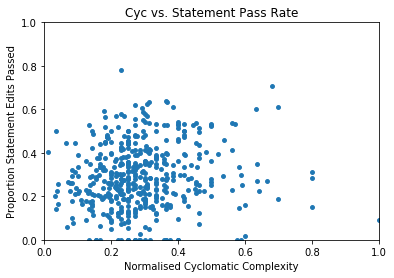

In [5]:
# plot 3 - norm cyclomatic vs proportion of statement passed
# now plot the lines
plt.scatter(normCyc,propStatementPassed,s=15)
ax=plt.gca()
ax.set_xlim(0,1)
ax.set_ylim(0,1)
plt.xlabel("Normalised Cyclomatic Complexity");
plt.ylabel("Proportion Statement Edits Passed");
plt.title("Cyc vs. Statement Pass Rate");
  #cbar=plt.colorbar()
  #cbar.set_label('proportion passed')
  #plt.savefig('imfilesNew/'+hist_dir+'/'+p+'mean_scatter.png')
plt.show() # won't work without tkl
plt.close()

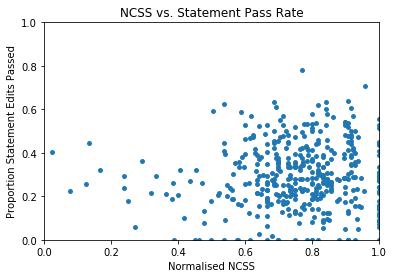

In [6]:
# plot 4 - norm ncss vs proportion of statement passed
# now plot the lines
plt.scatter(normNCSS,propStatementPassed,s=15)
ax=plt.gca()
ax.set_xlim(0,1)
ax.set_ylim(0,1)
plt.xlabel("Normalised NCSS");
plt.ylabel("Proportion Statement Edits Passed");
plt.title("NCSS vs. Statement Pass Rate");
  #cbar=plt.colorbar()
  #cbar.set_label('proportion passed')
  #plt.savefig('imfilesNew/'+hist_dir+'/'+p+'mean_scatter.png')
plt.show() # won't work without tkl
plt.close()

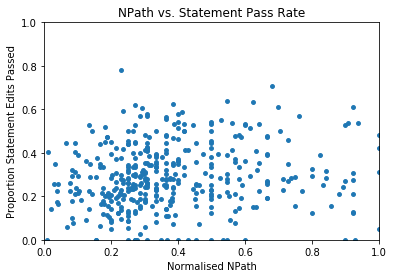

In [7]:
# plot 5 - norm NPath vs proportion of statement passed
# now plot the lines
plt.scatter(normNPath,propStatementPassed,s=15)
ax=plt.gca()
ax.set_xlim(0,1)
ax.set_ylim(0,1)
plt.xlabel("Normalised NPath");
plt.ylabel("Proportion Statement Edits Passed");
plt.title("NPath vs. Statement Pass Rate");
  #cbar=plt.colorbar()
  #cbar.set_label('proportion passed')
  #plt.savefig('imfilesNew/'+hist_dir+'/'+p+'mean_scatter.png')
plt.show() # won't work without tkl
plt.close()


# Filters (statements)

Now we filter our methods to populate the table from before:


|        | Predicted APM-able          | Predicted non-GI able   |
| ------------- |-------------| ------|
| **Actual GI-Able**      | Predictably good methods | Surprisingly good methods |
| **Actual non-GI-Able**     | Suprisingly bad methods  | Predictably bad methods |

We get a list of methods in each cell according to the criteria described at the start of this file. We had to relax the cyclomatic complexity constraint for the *surprisingly good methods* there were very few methods. in this category. 

In [8]:
# little filter on coverage
dfFilt=df # copy table ref
dfFilt=dfFilt.loc[dfFilt['InstCoverage']>=1] # include only those who have 100% coverage

In [9]:

# apply filters Good Citizens (high pass)
aveUDThresh=0.5;
medUDThresh=0.5;
cycThresh=0.3;
passThresh=0.5;

dfFilt=dfFilt.loc[dfFilt['PropStatPassed']>=passThresh]
# 
#dfFilt=dfFilt.loc[dfFilt['AveUseDefDist/MethodLength']>=aveUDThresh]
# 
dfFilt=dfFilt.loc[dfFilt['MedUseDefDist/MethodLength']>=medUDThresh]
# 
dfFilt=dfFilt.loc[dfFilt['cyc/length']<=cycThresh]
# 
#pandas.set_option('display.max_colwidth', None)
print(dfFilt[['Project','MethodIndex','MethodName']])
dfFilt.to_csv('predictably_good.csv')

       Project  MethodIndex                                         MethodName
108      druid          806  com.alibaba.druid.sql.dialect.oracle.parser.Or...
113      druid          498  com.alibaba.druid.sql.dialect.mysql.visitor.My...
118      druid          505  com.alibaba.druid.sql.dialect.mysql.parser.MyS...
141       gson           41    com.google.gson.stream.JsonWriter.beforeValue()
144  mybatis-3           38  org.apache.ibatis.builder.xml.XMLConfigBuilder...
173  spatial4j           27  org.locationtech.spatial4j.context.SpatialCont...
216  mybatis-3          178  org.apache.ibatis.builder.xml.XMLMapperBuilder...


```
# This is formatted as code
```

# Predictably APM-able Methods (statements)



***com.alibaba.druid.pool.DruidDataSource.emptySignal()***
> Method starts with three guards that, if true, just return.
> The last three lines to a simple update to the object state.
> If edits hit the guards and tests don't activate them then edits will be neutral (incomplete coverage)



***com.alibaba.druid.pool.DruidDataSource.putLast(DruidConnectionHolder,long)***

> Some guarded assignments - guards activated when maximum counts reached (are these tested? Few inter-statement dependencies. Opportunities for reordering. (Incomplete coverage?)


***com.alibaba.druid.sql.dialect.oracle.parser.OracleExprParser.partitionClauseRest(SQLPartitionBy)***

> Two guarded if statements that could be reordered without affecting semantics (these, between them, contain all the code in the method. However, within each, if statements are sequenced calls to a state dependent tokeniser. This code could be fragile to edits if exercised by tests. 
**This might not be as amenable to line-edits (this prediction is wrong in this case)

***com.alibaba.druid.sql.dialect.mysql.visitor.MySqlOutputVisitor.visit(SQLExprTableSource)***
> Prints out structures from its parameter. A for loop sandwiched between two if-statements. The body's of these if statements are likely to be executed for non-null input and the sequencing matters if the tests check what is printed (do tests check stdout?). (incomplete coverage?)

***com.google.gson.stream.JsonWriter.beforeValue()***
>Case statement dependent on current parser state no assignment to local state in any clause. Most clauses disjoint and can be reordered.(malleable code)

***org.apache.ibatis.builder.xml.XMLConfigBuilder.settingsElement(Properties)***
>One long sequence of independent assignments to a global config structure. Very easy to reorder statements. Not clear that all settings would exercised in tests (there are lot of config assignments). 

***org.locationtech.spatial4j.context.SpatialContextFactory.checkDefaultFormats()***
> Two guarded if statements (active if reader or writer instance variables are empty) that add to state of the reader and writer. Statements in if statements add list of handlers - there doesn't seem to be a necessary sequential ordering between them.

*** org.apache.ibatis.builder.xml.XMLMapperBuilder.bindMapperForNamespace()***
>Conditionally updates a global configuration structure no local references. 


## summary

Some indications for some methods of code being difficult to test throughly (e.g. reliant on structures being completely full or reliant on tests looking at stdout). In others, signs that code could be easily reorded e.g. independent assignment statements.


In [19]:
# copy table
dfFilt=df
# apply filters Good Citizens (low pass)
aveUDThresh=0.3;
medUDThresh=0.2;
cycThresh=0.5;
passThresh=0.2;

dfFilt=dfFilt.loc[dfFilt['PropStatPassed']<=passThresh]
# 
#dfFilt=dfFilt.loc[dfFilt['AveUseDefDist/MethodLength']<=aveUDThresh]
# 
dfFilt=dfFilt.loc[dfFilt['MedUseDefDist/MethodLength']<=medUDThresh]
# 
dfFilt=dfFilt.loc[dfFilt['cyc/length']>=cycThresh]
# 
#pandas.set_option('display.max_colwidth', None)
print(dfFilt[['Project','MethodIndex','MethodName']])
dfFilt.to_csv('predictably_bad.csv')

     Project  MethodIndex                                         MethodName
297   jcodec          404  org.jcodec.codecs.h264.io.CABAC.readIntraChrom...
300  opennlp           18  opennlp.tools.ml.model.ComparableEvent.compare...
308   jcodec          125  org.jcodec.codecs.h264.decode.SliceReader.read...
331    spark           18  spark.utils.MimeParse.fitnessAndQualityParsed(...
420   arthas            3  com.taobao.arthas.core.util.TokenUtils.findSec...


# Predictably Non-GI-Able methods (statements)

**org.jcodec.codecs.h264.io.CABAC.readIntraChromaPredMode**
> Cascading conditional execution with sequential dependencies on statements which are, in turn, dependent on all function parameters. Return value dependent on selection of right condition. 

**opennlp.tools.ml.model.ComparableEvent.compareTo**
> Code for structural comparision of input parameters. Sequential logic at start of method controling a loop which traverses equivalent of tagged union structure with nested cascading logic.

**org.jcodec.codecs.h264.decode.SliceReader.readPredictionI4x4Block**
> sequential logic feeding two guarded if-statements (complex guards) updating a statement setting a return value.

**spark.utils.MimeParse.fitnessAndQualityParsed**
> sequential logic feeding nested loop with guarded if statements interspersed with sequential logic.

**com.taobao.arthas.core.util.TokenUtils.findSecondTokenText**
> as above.

## summary

Code has strong sequential dependencies that would be broken by code movement.


In [11]:
# copy table
dfFilt=df
# apply filters unpredictable rogues
aveUDThresh=0.5;
medUDThresh=0.5;
cycThresh=0.3;
passThresh=0.2;

dfFilt=dfFilt.loc[dfFilt['PropStatPassed']<=passThresh]
# 
#dfFilt=dfFilt.loc[dfFilt['AveUseDefDist/MethodLength']<=aveUDThresh]
# 
dfFilt=dfFilt.loc[dfFilt['MedUseDefDist/MethodLength']>=medUDThresh]
# 
dfFilt=dfFilt.loc[dfFilt['cyc/length']<=cycThresh]
# 
#pandas.set_option('display.max_colwidth', None)
print(dfFilt[['Project','MethodIndex','MethodName']])
dfFilt.to_csv('unpredictably_bad.csv')

      Project  MethodIndex                                         MethodName
0      junit4          331     junit.runner.BaseTestRunner.filterLine(String)
1        gson            7  com.google.gson.Gson.atomicLongArrayAdapter(Ty...
2       spark            9  spark.staticfiles.StaticFilesConfiguration.con...
3     opennlp           57      opennlp.tools.util.AbstractEventStream.read()
5     opennlp          131  opennlp.tools.postag.POSSampleEventStream.gene...
6   mybatis-3          145  org.apache.ibatis.builder.xml.XMLStatementBuil...
13      spark           11  spark.staticfiles.StaticFilesConfiguration.con...
22     jcodec          366  org.jcodec.codecs.h264.decode.BlockInterpolato...
26  mybatis-3          136  org.apache.ibatis.executor.resultset.ResultSet...
28     junit4          354  org.junit.experimental.categories.CategoryFilt...
29     junit4          170  org.junit.internal.TextListener.printFooter(Re...
30     jcodec          333  org.jcodec.codecs.h264.decode.BlockI

# Surprisingly non-APM-able methods (statements)

**junit.runner.BaseTestRunner.filterLine**
> Falsely large distance between variable definition and use because of multi-line constant definiton of an array.

**com.google.gson.Gson.atomicLongArrayAdapter**
> Consists of inlined inner class declaration with inline-overriden methods with tight dependencies on their parameters. This inner class declaration forms an object which has a method called on it.

**spark.staticfiles.StaticFilesConfiguration.configure**
> Conditional logic dependent on transforms of object state - no dependencies on parameters.

**opennlp.tools.util.AbstractEventStream.read**
> Detailed logic dependent on side-effects from parsing stream state (hidden state dependencies.

**opennlp.tools.postag.POSSampleEventStream.generateEvents**
> This one is surprising - it has tight dependencies on parameters and assigns to a an aggregate variable repeatedly in a loop (whilst accessing another aggregate structure). It could be that the relatively small method length means the relative def/use distance is larger.

**org.apache.ibatis.builder.xml.XMLStatementBuilder.parseSelectKeyNode**
> as above, tight method. Quite short distances. Call to void parse method that would have to update state to have any effect. 

## summary

There seems to be a combination of causes of the combination of high-def use distance and low cyclomatic complexity coupled with low GI-ability:

1. hidden dependencies - in some cases through changes to state of other objects (side-effects) or input streams.

2. overestimates of def-use distance - either because the method is quite small (e.g. POSSampleEventStream.generateEvents) giving large relative distances or because single statements span several lines (e.g. junit.runner.BaseTestRunner.filterLine). 




In [18]:
# copy table
dfFilt=df
# apply filters unpredictable rogues
aveUDThresh=0.3;
medUDThresh=0.2;
cycThresh=0.5;
passThresh=0.5;

dfFilt=dfFilt.loc[dfFilt['PropStatPassed']>=passThresh]
# 
#dfFilt=dfFilt.loc[dfFilt['AveUseDefDist/MethodLength']<=aveUDThresh]
# 
dfFilt=dfFilt.loc[dfFilt['MedUseDefDist/MethodLength']<=medUDThresh]
# 
#dfFilt=dfFilt.loc[dfFilt['cyc/length']>=cycThresh] #dropped this constraint to get some samples
# 
#pandas.set_option('display.max_colwidth', None)
print(dfFilt[['Project','MethodIndex','MethodName']])
print(dfFilt['MethodName'].to_string(index=False))
dfFilt.to_csv('unpredictably_good.csv')

       Project  MethodIndex                                         MethodName
442     junit4          658  org.junit.internal.runners.ClassRoadie.runAfte...
446      druid          440  com.alibaba.druid.pool.DruidPooledConnection.t...
454     jcodec          311  org.jcodec.codecs.h264.decode.BlockInterpolato...
464  mybatis-3          193  org.apache.ibatis.mapping.CacheBuilder.setStan...
466     arthas            2  com.taobao.arthas.core.view.ObjectView.renderO...
 org.junit.internal.runners.ClassRoadie.runAfte...
 com.alibaba.druid.pool.DruidPooledConnection.t...
 org.jcodec.codecs.h264.decode.BlockInterpolato...
 org.apache.ibatis.mapping.CacheBuilder.setStan...
 com.taobao.arthas.core.view.ObjectView.renderO...


# Surprisingly APM-able methods (statements)
Only the first of these meets the criterion for both median def use and cyclomatic complexity. If we ignore the cyclomatic complexity threshold we get the other four.

**com.alibaba.druid.pool.DruidPooledConnection.transactionRecord**
> two mutually exclusive guarded if-statements that can be run independently. Strong dependencies within each. Falsification would rely on thorough testing. (might not be as amenable to line edits)

**org.junit.internal.runners.ClassRoadie.runAfters**
> small method with two catch blocks. one is explicitly labelled as likely to be impossible to be activated (possible dead code).

**org.jcodec.codecs.h264.decode.BlockInterpolator.getLuma23**
> two calls with side effects followed by a nested for loop. Perhaps two pairs of statements that can be swapped without causing failure. 

**org.apache.ibatis.mapping.CacheBuilder.setStandardDecorators**
> heavily dependent on parameters. Try catch block with independent if-statements some of which look like they could be re-ordered.

**com.taobao.arthas.core.view.ObjectView.renderObject**
> Strong sequential dependencies. Recursive descent of structure, nested if, else-if, else statements - would require comprehensive testing to pick up destructive edits. Arthas has limited test coverage? 


## summary
The full predictor is good at not wrongfully convicting methods as being non-gi-able. When the cyclomatic complexity filter is removed the methods that tend to be wrongfully labelled as non-gi-able might have issues with test coverage (once explicitly labelled in comments). In the one case where the full filter set wrongly labels a method that method has some GI-ability at the statement-block level.

# Filters (Lines)

Now we filter our methods to populate the table above but for lines.

In [13]:
# little filter on coverage
dfFilt=df # copy table ref
dfFilt=dfFilt.loc[dfFilt['InstCoverage']>=1] # include only those who have 100% coverage

# apply filters Good Citizens (high pass)
aveUDThresh=0.5;
medUDThresh=0.5;
cycThresh=0.3;
passThresh=0.3;

dfFilt=dfFilt.loc[dfFilt['PropLinePassed']>=passThresh]
# 
#dfFilt=dfFilt.loc[dfFilt['AveUseDefDist/MethodLength']>=aveUDThresh]
# 
dfFilt=dfFilt.loc[dfFilt['MedUseDefDist/MethodLength']>=medUDThresh]
# 
dfFilt=dfFilt.loc[dfFilt['cyc/length']<=cycThresh]
# 
#pandas.set_option('display.max_colwidth', None)
print(dfFilt[['Project','MethodIndex','MethodName']])
dfFilt.to_csv('predictably_good_lines.csv')

       Project  MethodIndex                                         MethodName
6    mybatis-3          145  org.apache.ibatis.builder.xml.XMLStatementBuil...
68       druid          623  com.alibaba.druid.pool.DruidPooledConnection.c...
108      druid          806  com.alibaba.druid.sql.dialect.oracle.parser.Or...
118      druid          505  com.alibaba.druid.sql.dialect.mysql.parser.MyS...
144  mybatis-3           38  org.apache.ibatis.builder.xml.XMLConfigBuilder...
173  spatial4j           27  org.locationtech.spatial4j.context.SpatialCont...


# Predictably APM-able Methods (lines)

Listing only the ones which weren't detected by the statement filter

org.apache.ibatis.builder.xml.XMLStatementBuilder.parseSelectKeyNode(String,XNode,Class\<?>,LanguageDriver,String) 
> Lots of independent assignment statements in the initial part of the method. Almost no nesting.


com.alibaba.druid.pool.DruidPooledConnection.checkState()
> very low number of line dependencies. Some guarded lines of code? Not sure if the states protected  by the guards are active in testing. Doesn't look particularly line-editable if thoroughly tested.


org.locationtech.spatial4j.context.SpatialContextFactory.checkDefaultFormats()
> Seems to be adding to collections of writers and readers - could well be independent which would allow easy reording of lines within the two if statements in this method.

## summary 
same pattern as for predictably gi-able statment edits.

In [14]:
# copy table
dfFilt=df
# apply filters Good Citizens (low pass)
aveUDThresh=0.3;
medUDThresh=0.2;
cycThresh=0.5;
passThresh=0.1;

dfFilt=dfFilt.loc[dfFilt['PropLinePassed']<=passThresh]
# 
#dfFilt=dfFilt.loc[dfFilt['AveUseDefDist/MethodLength']<=aveUDThresh]
# 
dfFilt=dfFilt.loc[dfFilt['MedUseDefDist/MethodLength']<=medUDThresh]
# 
dfFilt=dfFilt.loc[dfFilt['cyc/length']>=cycThresh]
# 
#pandas.set_option('display.max_colwidth', None)
print(dfFilt[['Project','MethodIndex','MethodName']])
dfFilt.to_csv('predictably_bad_line.csv')

       Project  MethodIndex                                         MethodName
297     jcodec          404  org.jcodec.codecs.h264.io.CABAC.readIntraChrom...
300    opennlp           18  opennlp.tools.ml.model.ComparableEvent.compare...
308     jcodec          125  org.jcodec.codecs.h264.decode.SliceReader.read...
331      spark           18  spark.utils.MimeParse.fitnessAndQualityParsed(...
338     jcodec          353  org.jcodec.codecs.h264.io.CABAC.readMBQpDelta(...
398    opennlp           80  opennlp.tools.ml.model.ComparablePredicate.com...
400  mybatis-3           14  org.apache.ibatis.builder.xml.XMLConfigBuilder...
416       gson           27           com.google.gson.JsonParser.parse(Reader)
420     arthas            3  com.taobao.arthas.core.util.TokenUtils.findSec...


# predicatably non-gi-able (lines)

Listing only the ones which weren't detected by the statement filter

org.jcodec.codecs.h264.io.CABAC.readMBQpDelta(MDecoder,MBType)
>very tight local dependencies. Would be bad also for statements (and it is close to the bad boundary for statement)


opennlp.tools.ml.model.ComparablePredicate.compareTo(ComparablePredicate)
>strong dependencies between both  lines and statements of code. 


org.apache.ibatis.builder.xml.XMLConfigBuilder.mapperElement(XNode)
>tight control and data dependencies. 


com.google.gson.JsonParser.parse(Reader)
>very short method with try catches and very tight dependencies.

## summary
same patterns here as for statements. Tight data and control dependencies.

In [15]:
# copy table
dfFilt=df
# apply filters unpredictable rogues
aveUDThresh=0.5;
medUDThresh=0.5;
cycThresh=0.3;
passThresh=0.1;

dfFilt=dfFilt.loc[dfFilt['PropLinePassed']<=passThresh]
# 
#dfFilt=dfFilt.loc[dfFilt['AveUseDefDist/MethodLength']<=aveUDThresh]
# 
dfFilt=dfFilt.loc[dfFilt['MedUseDefDist/MethodLength']>=medUDThresh]
# 
dfFilt=dfFilt.loc[dfFilt['cyc/length']<=cycThresh]
# 
#pandas.set_option('display.max_colwidth', None)
print(dfFilt[['Project','MethodIndex','MethodName']])
dfFilt.to_csv('unpredictably_bad_line.csv')

      Project  MethodIndex                                         MethodName
0      junit4          331     junit.runner.BaseTestRunner.filterLine(String)
1        gson            7  com.google.gson.Gson.atomicLongArrayAdapter(Ty...
2       spark            9  spark.staticfiles.StaticFilesConfiguration.con...
4        gson            2               com.google.gson.GsonBuilder.create()
5     opennlp          131  opennlp.tools.postag.POSSampleEventStream.gene...
8      jcodec           79  org.jcodec.codecs.h264.decode.SliceReader.read...
13      spark           11  spark.staticfiles.StaticFilesConfiguration.con...
21     jcodec          471  org.jcodec.codecs.h264.decode.SliceHeaderReade...
22     jcodec          366  org.jcodec.codecs.h264.decode.BlockInterpolato...
26  mybatis-3          136  org.apache.ibatis.executor.resultset.ResultSet...
28     junit4          354  org.junit.experimental.categories.CategoryFilt...
29     junit4          170  org.junit.internal.TextListener.prin

# unpredicatably non-gi-able (lines)


com.google.gson.GsonBuilder.create()
>average def-use distance exaggerated by large multiline return statement. Possible hidden dependencies through side-effects on factory object.


org.jcodec.codecs.h264.decode.SliceReader.readMBlock(MBlock,SliceType)
>moderately tight line dependencies. Could be some side effect on mblock structure. 

org.jcodec.codecs.h264.decode.SliceHeaderReader.readReorderingEntries(BitReader)
>short method with implicit sequential dependencies through calls to add in ArrayList objects.

org.apache.ibatis.builder.BaseBuilder.resolveTypeHandler(Class,Class>)
>Short method with tight control dependencies.

org.jcodec.common.io.DummyBitstreamReader.read1BitInt()
>Side effect through stream reader state embedded in object.

com.alibaba.druid.pool.DruidDataSource.emptySignal()
>cascading if control dependent on object state. statements that update
object state - could be implicit dependencies.

## summary
same patterns as seen for statements - hidden dependencies/side effects.

In [16]:
# copy table
dfFilt=df
# apply filters unpredictable rogues
aveUDThresh=0.3;
medUDThresh=0.2;
cycThresh=0.5;
passThresh=0.3;

dfFilt=dfFilt.loc[dfFilt['PropLinePassed']>=passThresh]
# 
#dfFilt=dfFilt.loc[dfFilt['AveUseDefDist/MethodLength']<=aveUDThresh]
# 
dfFilt=dfFilt.loc[dfFilt['MedUseDefDist/MethodLength']<=medUDThresh]
# 
#dfFilt=dfFilt.loc[dfFilt['cyc/length']>=cycThresh]
# 
#pandas.set_option('display.max_colwidth', None)
print(dfFilt[['Project','MethodIndex','MethodName']])
print(dfFilt['MethodName'].to_string(index=False))
dfFilt.to_csv('unpredictably_good_line.csv')

    Project  MethodIndex                                         MethodName
362   druid          631    com.alibaba.druid.util.FnvHash.fnv1a_64(String)
396  jcodec          262      org.jcodec.containers.mxf.model.UL.toString()
457   druid          690  com.alibaba.druid.sql.ast.expr.SQLPropertyExpr...
   com.alibaba.druid.util.FnvHash.fnv1a_64(String)
     org.jcodec.containers.mxf.model.UL.toString()
 com.alibaba.druid.sql.ast.expr.SQLPropertyExpr...


# unpredictably gi-able (lines)
All three below are new (no overlap with statements)
com.alibaba.druid.util.FnvHash.fnv1a_64(String)
>Strong sequential dependency (hash function for strings). Can swap two blocks in method.


org.jcodec.containers.mxf.model.UL.toString()
>Sequential string building. Can reorder some statements but not many.

com.alibaba.druid.sql.ast.expr.SQLPropertyExpr.computeHashCode64()
>Sequential dependencies and control but some lines are copied and can be substituted for each other. 

## summary
These methods look non-APM-able with the possible exception of the last one that has code clones which can be exchanged without changing semantics.
